# Deep Learning & Applied AI

# Tutorial 1: Tensors 

In this tutorial, we will cover:

- PyTorch Tensors: creation, gpu tensors, shape manipulation, indexing

Prerequisites:

- Python

Our info:

- Luca Moschella (moschella@di.uniroma1.it)
- Antonio Norelli (norelli@di.uniroma1.it)

Course:

- Website and notebooks will be available at https://erodola.github.io/DLAI-s2-2020/



## Introduction

Many Deep Learning frameworks have emerged for python. Arguably the most notable ones in 2019 are **TensorFlow** (with keras frontend) and **PyTorch**.
We will use PyTorch, which is currently [the leading DL framework](https://thegradient.pub/state-of-ml-frameworks-2019-pytorch-dominates-research-tensorflow-dominates-industry/) for research.

## Numpy

Numpy is a library for high-performance scientific computing in Python. It provides a multidimensional array object and tools for working with these arrays.

We'll refer to such **n-dimensional arrays as tensors**.

It is important to know how to use Numpy even if we will mainly use PyTorch  tensors for implementing our Deep Learning systems, since:

- Numpy tensors and PyTorch tensors are very similar, most of the features that we will explain for PyTorch tensors apply to Numpy tensors.
- In real DL systems you need to constantly switch between the two.

If you have previous knowledge in Matlab, we recommend the [numpy for Matlab users page](https://docs.scipy.org/doc/numpy-1.15.0/user/numpy-for-matlab-users.html) as a useful resource.



In [0]:
import numpy as np

## PyTorch

During the course we'll use and learn many parts of its API.
You should also familiarize with the [PyTorch Documentation](https://pytorch.org/docs/stable/) as it will greatly assist you.




In [2]:
import torch
torch.__version__

'1.4.0'

### **PyTorch Tensor**

The ``Tensor`` class is very similar to numpy's ``ndarray`` and provides most of its functionality.


However, it also has two important distinctions:

- Support for GPU computations.
- Each tensor may store extra information needed *to* perform back propagation:
  - The gradient tensor w.r.t. some variable (e.g. the loss)
  - A node representing an operation in the computational graph that produced this tensor.


Keep in mind:

- Usually **tensor operations are not in-place**

#### **Tensor construction**

A tensor represents an n-dimensional grid of values, **all of the same type**. 

In [3]:
# Basic tensor creation from python lists
torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.int32)

tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32)

In [4]:
# Some other tensor construction methods
torch.zeros((3,5))

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [5]:
torch.ones((2,5), dtype=torch.float64)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], dtype=torch.float64)

In [6]:
torch.eye(4)

tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])

In [7]:
torch.rand((2,2))

tensor([[0.1247, 0.1998],
        [0.4345, 0.4637]])

In [8]:
torch.randint(0, 100, (3,3))

tensor([[13, 32, 42],
        [19, 95, 10],
        [69, 93, 94]])

In [9]:
t = torch.rand((3, 3))
torch.ones_like(t)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

It is possible to easily convert to/from Numpy tensors:

In [10]:
t = torch.rand((3, 3), dtype=torch.float32)
t.numpy()

array([[0.00156087, 0.4444105 , 0.9492062 ],
       [0.6479398 , 0.26873899, 0.20878828],
       [0.5404571 , 0.46567917, 0.91139543]], dtype=float32)

In [11]:
n = np.random.rand(3,3).astype(np.float16)
torch.from_numpy(n)

tensor([[0.5205, 0.6519, 0.7744],
        [0.0482, 0.6895, 0.3210],
        [0.2520, 0.9697, 0.4143]], dtype=torch.float16)

There are many other functions available to create tensors!

> **EXERCISE**
>
> Create a matrix $M \in R^{3 \times 3}$ that is filled with 2 along the diagonal and 1 elsewhere, that is:
>
> $$
m_{ij} =
\begin{cases}
2 & \text{if } i = j \\
1 & \text{otherwise}
\end{cases}
$$ 

In [12]:
torch.ones((3, 3)) + torch.eye(3)

tensor([[2., 1., 1.],
        [1., 2., 1.],
        [1., 1., 2.]])

#### **Tensor properties**

The **type** of a tensor is the type of each element contained in the tensor:

In [13]:
t = torch.rand((3, 3))
t.dtype

torch.float32


The **shape** of a tensor is a tuple of integers giving the size of the tensor along each dimension, e.g. for a matrix $M \in R^{3 \times 5}$:

In [14]:
t = torch.rand((3,5))
t.shape

torch.Size([3, 5])

The **device** of a tensor indicates the memory in which the tensor currently resides: RAM (indicated as ``cpu``) or GPU memory (indicated ``cuda``)

In [15]:
t = torch.rand((3,5))
t.device

device(type='cpu')

> **EXERCISE**
>
> Given a matrix $X \in R^{m \times n}$, create another matrix $Y \in R^{m \times 3}$ filled with ones.

In [16]:
x = torch.rand(100,42)

torch.ones_like(x).shape

torch.Size([100, 42])

#### **Using the GPU**

It is possible to move tensors to **GPU** memory, if a GPU is available on the machine.

Operations between tensors in the GPU memory will use the GPU computation capability.

In [17]:
from IPython.display import YouTubeVideo, HTML, display

display(YouTubeVideo('-P28LKWTzrI?t=14'))

In [18]:
# Check if the GPU is available
torch.cuda.is_available()

True

In [19]:
# If available use the GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [20]:
t = torch.rand((3,3))
t = t.to(device)  # Pay attention to re-assign the variable!
t

tensor([[0.2671, 0.8841, 0.9379],
        [0.5459, 0.9374, 0.9977],
        [0.1277, 0.3712, 0.0026]], device='cuda:0')

In [21]:
# Construct tensors directly on the GPU memory
t = torch.ones((5, 5), device='cuda')
t

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], device='cuda:0')

In [0]:
# Other methods to transfer tensors between devices
t = torch.rand((3,3))

In [23]:
t = t.cuda()
t

tensor([[0.0560, 0.5709, 0.5793],
        [0.8856, 0.0531, 0.1918],
        [0.6665, 0.5382, 0.1194]], device='cuda:0')

In [24]:
t = t.cpu()
t

tensor([[0.0560, 0.5709, 0.5793],
        [0.8856, 0.0531, 0.1918],
        [0.6665, 0.5382, 0.1194]])

#### **Tensor rank**

In **Numpy** and **PyTorch** the **rank** means **number of dimensions** (different meaning in Linear Algebra!)

In [0]:
from typing import Union

# Utility print function
def print_arr(*arr: Union[torch.Tensor, np.ndarray], prefix: str = "") -> None:
    """ Pretty print tensors, together with their shape and type
    
    :param arr: one or more tensors
    :param prefix: prefix to use when printing the tensors
    """
    print(
        "\n\n".join(
            f"{prefix}{str(x)} <shape: {x.shape}> <dtype: {x.dtype}>" for x in arr
        )
    )

- **rank-0** tensors are just scalars

In [26]:
t0 = torch.tensor(3, dtype=torch.double)

print_arr(t0) 

tensor(3., dtype=torch.float64) <shape: torch.Size([])> <dtype: torch.float64>


In [27]:
item = t0.item()  # convert tensor scalar to a python base type
item, type(item)

(3.0, float)

- **rank-1** tensors of length ``n``have a shape of ``(n,)``

In [28]:
# A rank-1 array
t1 = torch.tensor([1, 2, 3])

print_arr(t1)

tensor([1, 2, 3]) <shape: torch.Size([3])> <dtype: torch.int64>


In [29]:
# A rank-1 array with a single scalar
print_arr(torch.tensor([42]))

tensor([42]) <shape: torch.Size([1])> <dtype: torch.int64>


- **rank-2** tensors have a shape of ``(n, m)``

In [30]:
t2 = torch.tensor([[1, 2, 3], [4, 5, 6]])

print_arr(t2)

tensor([[1, 2, 3],
        [4, 5, 6]]) <shape: torch.Size([2, 3])> <dtype: torch.int64>


In [31]:
# A column vector is a rank-2 tensor
t_col = t1.reshape(-1, 1)

print_arr(t_col)

tensor([[1],
        [2],
        [3]]) <shape: torch.Size([3, 1])> <dtype: torch.int64>


In [32]:
# A row vector is a rank-2 tensor
t_row = t1.reshape(1, -1)

print_arr(t_row)

tensor([[1, 2, 3]]) <shape: torch.Size([1, 3])> <dtype: torch.int64>


> **NOTE**
>
> The rank-1 tensors are consider to be both row and column tensors


- **rank-k** tensors have a shape of $(n_1, \dots, n_k)$

In [33]:
print_arr(torch.zeros((2, 3, 4)))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]]) <shape: torch.Size([2, 3, 4])> <dtype: torch.float32>


In [34]:
print_arr(torch.ones((2, 2, 2, 2)))

tensor([[[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]],


        [[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]]]) <shape: torch.Size([2, 2, 2, 2])> <dtype: torch.float32>


> **EXERCISE**
>
> Build a tensor $X \in R^{4 \times 4}$ filled with zeros and the sequence $[0, 1, 2, 3]$ along the diagonal

In [35]:
# Build the tensor manually
b = torch.tensor([[0, 0, 0, 0],
                  [0, 1, 0, 0],
                  [0, 0, 2, 0],
                  [0, 0, 2, 3]
                  ], dtype=torch.float)
b

tensor([[0., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 2., 0.],
        [0., 0., 2., 3.]])

In [36]:
# Use advanced indexing
a = torch.zeros(4, 4)
indices = torch.arange(4, dtype=torch.long)
a[indices, indices] = indices.to(torch.float)  # You can use `.to` to convert between types
a

tensor([[0., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 2., 0.],
        [0., 0., 0., 3.]])

> **EXERCISE**
>
> Which is the shape of the following tensor?
> 
> ```
> tensor([[[1., 1.],
>           [1., 1.]],
> 
>          [[1., 1.],
>           [1., 1.]],
>
>          [[1., 1.],
>           [1., 1.]],
> 
>          [[1., 1.],
>           [1., 1.]]])
> ```



In [37]:
torch.tensor(
    [
     [[1., 1.],
      [1., 1.]],
     
     [[1., 1.],
      [1., 1.]],
     
     [[1., 1.],
      [1., 1.]],
     
     [[1., 1.],
      [1., 1.]]
     ]).shape

torch.Size([4, 2, 2])

### **Changing and adding dimensions**

PyTorch provides several functions to manipulate tensor's shapes


#### **Transpose dimension**

In [38]:
a = torch.ones((3, 5))
a[0, -1] = 0
print_arr(a)

tensor([[1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]) <shape: torch.Size([3, 5])> <dtype: torch.float32>


In [39]:
a.transpose(1, 0)  # Swap dimension 1 and 0

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [0., 1., 1.]])

In [40]:
torch.einsum('ij -> ji', a)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [0., 1., 1.]])

In [41]:
# It is possible to transpose in k-dimensions
a = torch.ones((2, 3, 6))
a[1, 2, 4] = 42
print_arr(a)

tensor([[[ 1.,  1.,  1.,  1.,  1.,  1.],
         [ 1.,  1.,  1.,  1.,  1.,  1.],
         [ 1.,  1.,  1.,  1.,  1.,  1.]],

        [[ 1.,  1.,  1.,  1.,  1.,  1.],
         [ 1.,  1.,  1.,  1.,  1.,  1.],
         [ 1.,  1.,  1.,  1., 42.,  1.]]]) <shape: torch.Size([2, 3, 6])> <dtype: torch.float32>


In [42]:
a.transpose(2, 1)

tensor([[[ 1.,  1.,  1.],
         [ 1.,  1.,  1.],
         [ 1.,  1.,  1.],
         [ 1.,  1.,  1.],
         [ 1.,  1.,  1.],
         [ 1.,  1.,  1.]],

        [[ 1.,  1.,  1.],
         [ 1.,  1.,  1.],
         [ 1.,  1.,  1.],
         [ 1.,  1.,  1.],
         [ 1.,  1., 42.],
         [ 1.,  1.,  1.]]])

In [43]:
torch.einsum('ijk->ikj', a)

tensor([[[ 1.,  1.,  1.],
         [ 1.,  1.,  1.],
         [ 1.,  1.,  1.],
         [ 1.,  1.,  1.],
         [ 1.,  1.,  1.],
         [ 1.,  1.,  1.]],

        [[ 1.,  1.,  1.],
         [ 1.,  1.,  1.],
         [ 1.,  1.,  1.],
         [ 1.,  1.,  1.],
         [ 1.,  1., 42.],
         [ 1.,  1.,  1.]]])

> **NOTE**
>
> In Numpy the transpose function is different!

In [44]:
a = np.arange(10).reshape(2, 5)
a

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [45]:
a.transpose(0, 1)

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [46]:
a.transpose(1, 0)

array([[0, 5],
       [1, 6],
       [2, 7],
       [3, 8],
       [4, 9]])

In [47]:
np.einsum('ij -> ji', a)

array([[0, 5],
       [1, 6],
       [2, 7],
       [3, 8],
       [4, 9]])

#### **Reshape**

Another important feature is **reshaping** a tensor into different dimensions

- We need to make sure to **preserve the same number of elements**. 
- Use `-1` in one of the dimensions to tell numpy to **figure it out**.


Pay attention that **transposing and reshaping are two fundamentally different operations**:

In [48]:
a = torch.arange(12).reshape(3,4 )
a

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [49]:
# The classical transpose
a.t()

tensor([[ 0,  4,  8],
        [ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11]])

In [50]:
# Reshape into the transpose shape
a.reshape(4, 3)

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])

Think of the `reshape` operations as unrolling the tensor **row-wise**, to obtain a rank-1 tensor. Then organize the values in this tensor following the specified dimensions.

```
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
```
$ \to $
```
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
```

Then, starting from the right-most dimension's size, organize the values into the dimensions

- e.g. reshape into `[4, 3]`:
```
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
```
$ \to $
```
tensor([[0,  1,  2],  [3,  4,  5],  [6,  7,  8],  [9, 10, 11]])
```
$ \to $
```
tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])
```

- e.g. reshape into `[2, 2, 3]`:
```
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
```
$ \to $
```
tensor([[0,  1,  2],  [3,  4,  5],  [6,  7,  8],  [9, 10, 11]])
```
$ \to $
```
tensor([[[0,  1,  2],  [3,  4,  5]],  [[6,  7,  8],  [9, 10, 11]]])
```
$ \to $
```
tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]]])
```

In [51]:
a = torch.arange(12)
print_arr(a)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]) <shape: torch.Size([12])> <dtype: torch.int64>


In [52]:
a.reshape(6, 2)

tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11]])

In [53]:
a.reshape(2, 6)

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])

In [54]:
a.reshape(2, 2, 3)

tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]]])

In [55]:
try:
  a.reshape(5, -1)
except RuntimeError as e:
  print(e)

shape '[5, -1]' is invalid for input of size 12


In [56]:
a.reshape(1, -1)

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]])

In [57]:
a.reshape(-1, 1)

tensor([[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10],
        [11]])

In [58]:
a.reshape(-1)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

> **NOTE**
>
> We can add or remove dimensions of size `1` using `torch.unsqueeze` or `torch.squeeze`

> **NOTE**
>
> If you want to be sure to obtain a reshaped view of the tensor, sharing the same underlying data avoiding copying data, you can use the `torch.view` method.
> It's semantic is similar to `reshape`, but it works only on `contiguous` tensors and it guarantees that no copy will be performed.

#### **Concatenation**

PyTorch provides many functions to manipulate tensors. 
Two of the most common functions are:

- `torch.stack`: Concatenates sequence of tensors along a new dimension.
- `torch.cat`: Concatenates the given sequence of seq tensors in the given dimension.

In [59]:
a = torch.arange(12).reshape(3, 4)
b = torch.arange(12).reshape(3, 4) + 100
print_arr(a, b)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]) <shape: torch.Size([3, 4])> <dtype: torch.int64>

tensor([[100, 101, 102, 103],
        [104, 105, 106, 107],
        [108, 109, 110, 111]]) <shape: torch.Size([3, 4])> <dtype: torch.int64>


In [60]:
out = torch.cat((a, b), dim=0)
print_arr(out)

tensor([[  0,   1,   2,   3],
        [  4,   5,   6,   7],
        [  8,   9,  10,  11],
        [100, 101, 102, 103],
        [104, 105, 106, 107],
        [108, 109, 110, 111]]) <shape: torch.Size([6, 4])> <dtype: torch.int64>


In [61]:
out = torch.stack((a, b), dim=0)
print_arr(out)

tensor([[[  0,   1,   2,   3],
         [  4,   5,   6,   7],
         [  8,   9,  10,  11]],

        [[100, 101, 102, 103],
         [104, 105, 106, 107],
         [108, 109, 110, 111]]]) <shape: torch.Size([2, 3, 4])> <dtype: torch.int64>


> **EXERCISE**
>
> Given a rank-1 array of increasing numbers from `0` to `9`, defined as:
>

In [62]:
a = torch.arange(10)
a

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

> Use only the `reshape` and `transpose` function to obtain the following tensor from `a`:
>
> ```python
> tensor([[0, 2, 4, 6, 8],
>         [1, 3, 5, 7, 9]])
> ```

In [63]:
a.reshape(5, 2).t()

tensor([[0, 2, 4, 6, 8],
        [1, 3, 5, 7, 9]])

> **EXERCISE**
>
> Given a tensor $X \in R^{3 \times 5 \times 8 \times 10}$ reshape it in order to obtain a tensor $Y \in R^{10 \times 8 \times 3 \times 5}$


In [64]:
a = torch.rand(3, 5, 8, 10)
a.shape

torch.Size([3, 5, 8, 10])

In [65]:
y = torch.einsum('abcd -> dcab', a)
y.shape

# a.reshape(10, 8, 3, 5) is wrong!

torch.Size([10, 8, 3, 5])

In [66]:
# If you want you can use multiple transpose...
o = a.transpose(0, 3)
o = o.transpose(-1, -2)
o = o.transpose(1, -1)
o.shape

torch.Size([10, 8, 3, 5])

In [67]:
torch.equal(y, o)

True

### **Tensor indexing**

PyTorch offers several ways to index tensors


#### **Standard indexing**

As standard Python lists, PyTorch tensors support the python indexing convenctions:

In [68]:
a = torch.arange(10)
a

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [69]:
print(a[0])  # first element
print(a[1])  # second element

tensor(0)
tensor(1)


In [70]:
print(a[-1])  # last element
print(a[-2])  # second last element

tensor(9)
tensor(8)


#### **Multidimensional indexing**

Since tensors may be multidimensional, you must specify **one index for each dimension**:

In [71]:
a = torch.arange(10).reshape(2, 5)
a

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [72]:
a[0]

tensor([0, 1, 2, 3, 4])

In [73]:
a[1]

tensor([5, 6, 7, 8, 9])

In [74]:
a[0, -1]

tensor(4)

#### **Slicing**

Similar to Python lists and Numpy arrays, PyTorch tensors can be easily sliced using the slice notation:

```python
a[start:stop]  # items start through stop-1
a[start:]      # items start through the rest of the array
a[:stop]       # items from the beginning through stop-1
a[:]           # a copy of the whole array
```

There is also the step value, which can be used with any of the above:

```python
a[start:stop:step] # start through not past stop, by step
```

In [75]:
a = torch.arange(10)
a

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [76]:
# Take the last 5 elements
a[-5:]

tensor([5, 6, 7, 8, 9])

In [77]:
# Index every element in a even index
a[::2]

tensor([0, 2, 4, 6, 8])

> **NOTE**
>
> Remember that the **slice syntax** is just a shortand.
>
> In Python everything is an object, even a ``slice``.
> It is possible to explicitly create a ``Slice`` object and reuse it to **index multiple tensors in the same way**:





In [78]:
# The signature follows the same pattern as above
s1 = slice(3)  # equivalent to the slice :3
s1

slice(None, 3, None)

In [79]:
type(s1)  # It is a built-in type

slice

In [80]:
out = a[s1]  # equivalent to a[:3]

print_arr(a, out)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) <shape: torch.Size([10])> <dtype: torch.int64>

tensor([0, 1, 2]) <shape: torch.Size([3])> <dtype: torch.int64>


In [81]:
mystring = 'this is just a string'
mystring[s1]

'thi'

In [82]:
s2 = slice(None, None, -1)
mystring[s2] 

'gnirts a tsuj si siht'

In [83]:
try:
  a[s2]  # PyTorch currently does not support negative steps
except ValueError as e:
  print(e)

negative step not yet supported


With multidimensional tensors we can perform **multidimensional slicing**:

In [84]:
a = torch.arange(10).reshape(2, 5)
a

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [85]:
# Take the second column
a[:, 1]

tensor([1, 6])

In [86]:
# Take the last column
a[:, -1]

tensor([4, 9])

In [87]:
# Take a slice from the last row
a[-1, -3:]

tensor([7, 8, 9])

You can **assign** to sliced tensors, modifying the original tensor.

Actually, indexing and slicing operations do their best to return tensors that **share the underlying data** with the original tensor.

In [88]:
a = torch.arange(10).reshape(2, 5)
a

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [89]:
b = a[0:2, 1:3]
b

tensor([[1, 2],
        [6, 7]])

In [90]:
b[-1, :] = -999
b

tensor([[   1,    2],
        [-999, -999]])

In [91]:
# The original tensor has been modified
a

tensor([[   0,    1,    2,    3,    4],
        [   5, -999, -999,    8,    9]])

In [92]:
a[-1, -1] = -1
a

tensor([[   0,    1,    2,    3,    4],
        [   5, -999, -999,    8,   -1]])

> **NOTE**
>
> Indexing with **integers yields lower rank tensors**

In [93]:
a = torch.arange(12).reshape(3, 4)
print_arr(a)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]) <shape: torch.Size([3, 4])> <dtype: torch.int64>


In [94]:
# Rank 1 view of the second row of a 
row_r1 = a[1, :]    
print_arr(row_r1)

tensor([4, 5, 6, 7]) <shape: torch.Size([4])> <dtype: torch.int64>


In [95]:
# Rank 2 view of the second row of a
row_r2 = a[1:2, :]
print_arr(row_r2)

tensor([[4, 5, 6, 7]]) <shape: torch.Size([1, 4])> <dtype: torch.int64>


In [96]:
# Rank 2 view of the second row of a
row_r3 = a[[1], :]
print_arr(row_r3)

tensor([[4, 5, 6, 7]]) <shape: torch.Size([1, 4])> <dtype: torch.int64>


In [97]:
# Same with the columns
print_arr(a[:, 1])
print_arr(a[:, [1]])

tensor([1, 5, 9]) <shape: torch.Size([3])> <dtype: torch.int64>
tensor([[1],
        [5],
        [9]]) <shape: torch.Size([3, 1])> <dtype: torch.int64>


#### **Integer array indexing**

It is a generalization of the slice: when you slice, the resulting tensor view will always be a subarray of the original tensor.

Integer array indexing allows you to construct arbitrary tensors, using the data from another tensor

In [98]:
a = torch.arange(1, 7).reshape(3, 2)
print_arr(a)

tensor([[1, 2],
        [3, 4],
        [5, 6]]) <shape: torch.Size([3, 2])> <dtype: torch.int64>


In [99]:
# Example of integer array indexing
# The returned array will have shape (3,)
b = a[[0, 1, 2], [0, 1, 0]]
print_arr(b)

tensor([1, 4, 5]) <shape: torch.Size([3])> <dtype: torch.int64>


In [100]:
# Equivalent to
v1, v2, v3 = a[0, 0], a[1, 1], a[2, 0]
b = torch.tensor([v1, v2, v3])
print_arr(b)

tensor([1, 4, 5]) <shape: torch.Size([3])> <dtype: torch.int64>


In [101]:
# You can re-use the same element of the source tensor multiple times!
print_arr(a[[0, 0], [1, 1]])
print_arr(torch.tensor([a[0, 1], a[0, 1]]))

tensor([2, 2]) <shape: torch.Size([2])> <dtype: torch.int64>
tensor([2, 2]) <shape: torch.Size([2])> <dtype: torch.int64>


In [102]:
# You can use another tensor to perform the indexing, 
# as long as they are have dtype=torch.int64 type
i = torch.ones(3, dtype=torch.int64)
i

tensor([1, 1, 1])

In [103]:
j = torch.tensor([0, 1, 0])
j

tensor([0, 1, 0])

In [104]:
out = a[i, j]

print_arr(a, out)

tensor([[1, 2],
        [3, 4],
        [5, 6]]) <shape: torch.Size([3, 2])> <dtype: torch.int64>

tensor([3, 4, 3]) <shape: torch.Size([3])> <dtype: torch.int64>


> **EXERCISE**
>
> Change one element in each row of a tensor $X \in R^{4 \times 3}$:
>
> `X[0,2] = -1`
>
> `X[1,1] = 0`
>
> `X[2,0] = 1`
>
> `X[3,1] = 2`



In [105]:
# Mutate one element from each row of a matrix
a = torch.arange(12).reshape(4, 3)
print(a, end='\n\n')

row_indices = torch.arange(a.shape[0])
a[row_indices, [2, 1, 0, 1]] = torch.tensor([-1, 0, 1, 2])

print(a)

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])

tensor([[ 0,  1, -1],
        [ 3,  0,  5],
        [ 1,  7,  8],
        [ 9,  2, 11]])


In [106]:
# Parametric row indexing

# Create an array of indices for each row
j = torch.tensor([2, 1, 0, 1])

# Select one element from each row using the indices in b
a[torch.arange(a.shape[0]), j]

tensor([-1,  0,  1,  2])

In [107]:
# Mutate one element from each row, using the indices in b
a[torch.arange(a.shape[0]), j] += 1000
a

tensor([[   0,    1,  999],
        [   3, 1000,    5],
        [1001,    7,    8],
        [   9, 1002,   11]])

> **NOTE**
>
> **Slice indexing vs Array indexing**


In [108]:
a = torch.arange(16).reshape(4, 4)
a

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])

In [109]:
a[0:3, 0:3]

tensor([[ 0,  1,  2],
        [ 4,  5,  6],
        [ 8,  9, 10]])

In [110]:
a[[0, 1, 2], [0, 1, 2]]

tensor([ 0,  5, 10])

In [111]:
a[0:5:2, 0:5:2]

tensor([[ 0,  2],
        [ 8, 10]])

#### **Boolean array indexing**

This type of indexing is used to select the elements of a tensor that satisfy some condition (similar to MATLAB's logical indexing):

In [112]:
a = torch.arange(6).reshape(3, 2)
a

tensor([[0, 1],
        [2, 3],
        [4, 5]])

In [113]:
bool_idx = (a > 2)
bool_idx

tensor([[False, False],
        [False,  True],
        [ True,  True]])

In [114]:
a[bool_idx]

tensor([3, 4, 5])

If you want to know more about indexing in PyTorch and Numpy read the [documentation](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html)

> **EXERCISE**
>
> Build a 3D tensor in $X \in R^{k \times k \times k}$ that has ones along the 3D-diagonal and zeros elsewhere, i.e. a 3D identity.

> **EXERCISE**
>
> Build a 3D tensor $X \in R^{w \times h \times 3}$ representing an image $w \times h$ plus the `(r, g, b)` color channel. Assume the color channel is the last dimension in the tensor and each color $c \in [0, 1]$.
>
> Color the image $X$ completely by red, i.e. `(1, 0, 0)` in the `(r, g, b)` format.

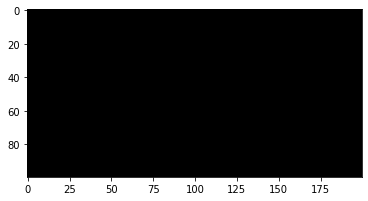

In [115]:
# Create and visualize a black image
x = torch.zeros(100, 200, 3)

%matplotlib inline
import matplotlib.pyplot as plt
img = plt.imshow(x)

> **EXERCISE**
>
> Given the GitHub logo $X \in R^{560 \times 560}$, change the black-ish color into light gray: $0.8$.  Assume the logo is in grey scale, with the color $c \in [0, 1]$ (remember 0 $\to$ black).
>
> Then draw a diagonal and anti-diagonal black line (i.e. an X) on the new image, to mark that the new logo is wrong.

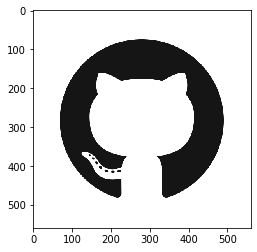

In [116]:
from skimage import io

image = io.imread('https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png', as_gray=True)
_ = plt.imshow(image, cmap='gray', vmin=0, vmax=1)

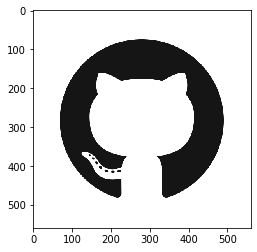

In [117]:
# Change the black into light-gray
X = torch.from_numpy(image.copy())  # PyTorch CPU and Numpy share the memory!
# ?
_ = plt.imshow(X, cmap='gray', vmin=0, vmax=1)

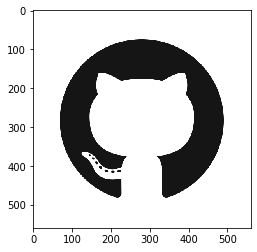

In [118]:
# Mark the new image as wrong with a big black X
# ?
_ = plt.imshow(X, cmap='gray', vmin=0, vmax=1)